# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Importing data

crop_data = pd.read_csv("/Crop_recommendation.csv")
crop_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Crop_recommendation.csv'

# **Data_Info**

In [36]:
crop_data.shape

(2200, 8)

In [37]:
 crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [38]:
crop_data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [39]:
crop_data.duplicated().sum()

0

In [40]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [41]:
corr = crop_data.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

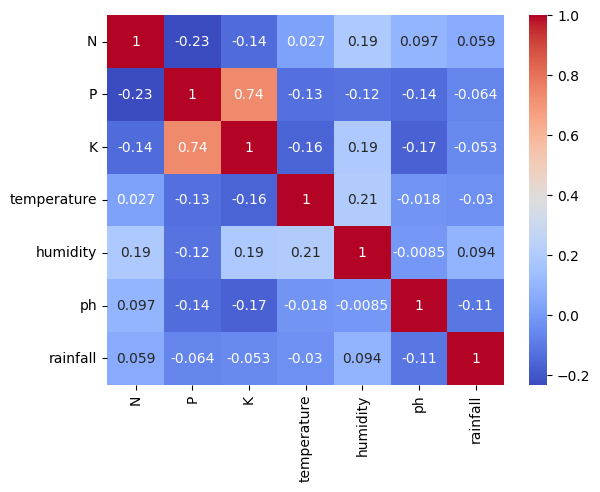

In [42]:
import seaborn as sns
sns.heatmap(corr, annot=True,cbar=True, cmap='coolwarm')

In [43]:
crop_data['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


<ipython-input-44-a3438a28e866>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['N'])


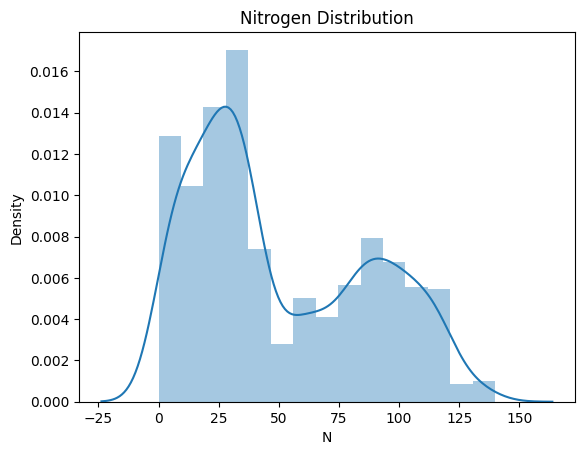

<ipython-input-44-a3438a28e866>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['P'])


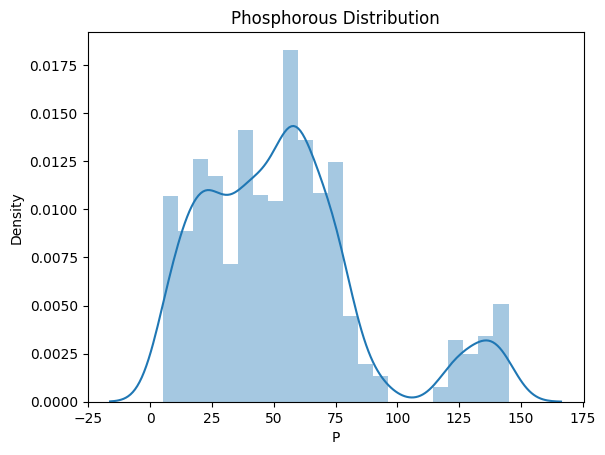

In [44]:
import matplotlib.pyplot as plt
sns.distplot(crop_data['N'])
plt.title('Nitrogen Distribution')
plt.show()

sns.distplot(crop_data['P'])
plt.title('Phosphorous Distribution')
plt.show()

# Converting String data into **Numeric**

In [45]:
ttl_lables = crop_data['label'].unique()
ttl_lables

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [46]:
# to find the correlation , data type of all the atttributes/columns should be in numeric form
# now we will convert the label coulumns data from string to intergers.

crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee' : 22
}

In [47]:
crop_data = crop_data.replace({'label': crop_dict})
crop_data.head()

<ipython-input-47-d494cfe174a1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crop_data = crop_data.replace({'label': crop_dict})


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


# **Train Test Split**

In [48]:
X = crop_data.drop('label', axis=1)
Y = crop_data['label']


In [49]:
X.shape

(2200, 7)

In [50]:
Y.shape

(2200,)

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


# Scaling the features using **MinMaxScaler**

In [52]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [53]:
X_train

array([[0.24285714, 0.20714286, 0.15      , ..., 0.3839651 , 0.45377988,
        0.26922341],
       [0.39285714, 0.44285714, 0.055     , ..., 0.64677359, 0.48084043,
        0.17940984],
       [0.07142857, 0.52857143, 0.065     , ..., 0.48082288, 0.3296839 ,
        0.59044787],
       ...,
       [0.07857143, 0.03571429, 0.2       , ..., 0.86567318, 0.4499364 ,
        0.31874807],
       [0.3       , 0.52857143, 0.4       , ..., 0.01823164, 0.40818716,
        0.20206965],
       [0.15714286, 0.40714286, 0.055     , ..., 0.46744731, 0.20592755,
        0.57707019]])

In [54]:
X_test

array([[0.04285714, 0.01428571, 0.01      , ..., 0.93587883, 0.57451936,
        0.33659047],
       [0.24285714, 0.3       , 0.07      , ..., 0.83058296, 0.47649795,
        0.11787278],
       [0.62857143, 0.35714286, 0.2       , ..., 0.77184463, 0.65713734,
        0.83882163],
       ...,
       [0.04285714, 0.30714286, 0.095     , ..., 0.82085443, 0.51101261,
        0.10108976],
       [0.24285714, 0.02857143, 0.155     , ..., 0.84101552, 0.43097058,
        0.32380727],
       [0.71428571, 0.25714286, 0.085     , ..., 0.82019683, 0.59313361,
        0.26278187]])

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train

array([[-0.44593328, -0.58856535, -0.25987405, ..., -1.09318957,
        -0.06726918, -0.15110348],
       [ 0.12794186,  0.41737531, -0.63427362, ..., -0.07801168,
         0.15224521, -0.6011954 ],
       [-1.10179059,  0.78317192, -0.59486314, ..., -0.71904688,
        -1.07393229,  1.45868149],
       ...,
       [-1.0744632 , -1.32015857, -0.06282165, ...,  0.76755472,
        -0.09844745,  0.09708455],
       [-0.22731418,  0.78317192,  0.72538797, ..., -2.50594652,
        -0.43711607, -0.48763797],
       [-0.77386193,  0.26496006, -0.63427362, ..., -0.77071411,
        -2.07784027,  1.39164057]])

# **Traning Models**

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score

models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Tree' : ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    print(f"{name} Accuracy: {accuracy_score(Y_test, Y_pred)}")


Naive Bayes Accuracy: 0.9954545454545455
Logistic Regression Accuracy: 0.9772727272727273
K-Nearest Neighbors Accuracy: 0.9704545454545455
Support Vector Machine Accuracy: 0.9795454545454545
Decision Tree Accuracy: 0.990909090909091
Extra Tree Accuracy: 0.925
Random Forest Accuracy: 0.9977272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.15681818181818183
Gradient Boosting Accuracy: 0.9863636363636363
Bagging Accuracy: 0.9931818181818182


Selected model for prediction is Random Forest as it has highest accuracy

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(Y_test, Y_pred)}")

Random Forest Accuracy: 0.9977272727272727


#  Predictive System

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [60]:
def recommend(N,P,K,Temperature,Humidity,PH,Rainfall):
  Features = np.array([[N,P,K,Temperature,Humidity,PH,Rainfall]])
  # Features = ms.transform(Features)
  prediction = rfc.predict(Features)

  return prediction[0]

In [64]:
N = 20
P = 30
K = 40
Temperature = 50.0
Humidity = 20
PH = 30
Rainfall = 50

prediction = recommend(N,P,K,Temperature,Humidity,PH,Rainfall)

crop_dict = {
    1:"Rice" ,
    2:"Maize",
    3:"Chickpeas",
    4:"Kidneybeans",
    5:"Pigeonpeas",
    6:"Mothbeans",
    7:"Mungbean",
    8:"Blackgram",
    9:"Lentil",
    10:"Pomegranate",
    11:"Banana",
    12:"Mango",
    13:"Grapes",
    14:"Watermelon",
    15:"Muskmelon",
    16:"Apple",
    17:"Orange",
    18:"Papaya",
    19:"Coconut",
    20:"Cotton",
    21:"Jute",
    22:"Coffee"
}

if prediction in crop_dict:
  crop = crop_dict[prediction]
  print(f'Recommended crop: {crop}')
else:
  print("We are not able to recommend any crop according to the requirements.")


Recommended crop: Apple


In [67]:
import pickle
pickle.dump(rfc, open('crop_recommendation.pkl', 'wb'))